In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## Ans : 1

df= pd.read_csv('dataset/dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Figure size 576x396 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

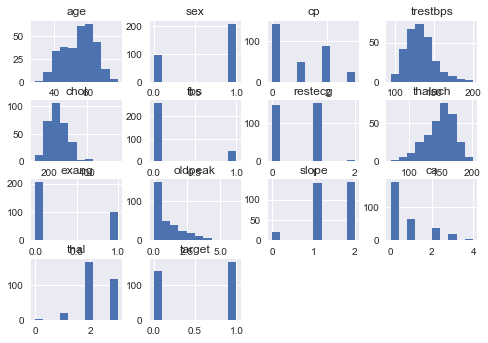

In [4]:
plt.style.use('seaborn')
plt.tight_layout()
plt.figure(figsize=(15,10))
df.hist()
plt.show()

In [5]:
df.isna().sum()

#  we don't have null values in dataset 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.dtypes

# there is no any categorical column is seen in dataset .

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
## sepration of dependent and independent feature

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
X.shape

(303, 13)

In [9]:
y.shape

(303,)

In [10]:
## scaling of data 

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [11]:
scaler

StandardScaler()

In [12]:
new_data=scaler.fit_transform(X)

In [13]:
new_data

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [14]:
X=new_data.copy()

In [15]:
X.shape

(303, 13)

In [16]:
## Ans : 2

## train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [17]:
## Ans : 3

## train random forest classifier 

from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=100,max_depth=10)

In [18]:
classifier

RandomForestClassifier(max_depth=10)

In [19]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [20]:
## Ans : 4

y_pred = classifier.predict(X_test)

In [21]:
## check accuracy 

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8021978021978022
0.82
0.82
0.82


In [22]:
## Ans : 5

## feature importances 
importances = classifier.feature_importances_
feature_importances = pd.DataFrame({'Features':df.columns[:-1],'Importance':importances})

In [23]:
fe=feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)
visualization=fe.iloc[:5,:]

In [24]:
fe

,Features,Importance
0,ca,0.150988
1,cp,0.125689
2,oldpeak,0.120409
3,thal,0.099460
4,thalach,0.095281
5,exang,0.079928
6,age,0.077359
7,chol,0.073872
8,trestbps,0.068831
9,slope,0.055007


In [25]:
feat=list(visualization['Features'])

<AxesSubplot:>

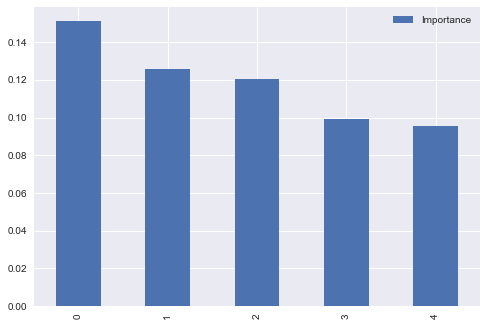

In [26]:
visualization.plot(kind='bar')


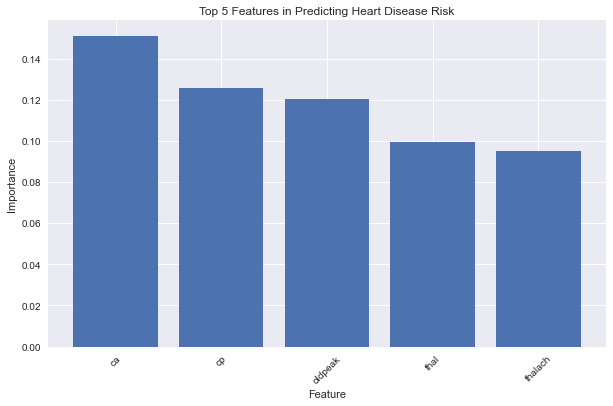

In [32]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
plt.bar(visualization['Features'], visualization['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Features in Predicting Heart Disease Risk')
plt.xticks(rotation=45)
plt.show()

In [33]:
## cross hyperparameter tuning

from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV ,cross_val_score

param={
    'n_estimators': [100, 200, 300],  # Different values for the number of trees
    'max_depth': [5, 10, 15],  # Different values for the maximum depth
    'min_samples_split': [2, 4, 8],  # Different values for the minimum samples split
    'min_samples_leaf': [1, 2, 4]  # Different values for the minimum samples leaf
}
classifier1=RandomForestClassifier()

randomcv =RandomizedSearchCV(classifier1,param_distributions=param,n_iter=10,scoring='accuracy',cv=5)
gridcv = GridSearchCV(classifier1,param_grid=param,cv=5,scoring='accuracy')

randomcv.fit(X_train,y_train)
gridcv.fit(X_train,y_train)

random_best_param=randomcv.best_params_
grid_best_params=gridcv.best_params_
random_best_score=randomcv.best_score_
grid_best_score = gridcv.best_score_

print(random_best_param)
print(grid_best_params)
print(random_best_score)
print(grid_best_score)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5}
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
0.8296788482834995
0.8346622369878183


In [34]:
classifier_random=RandomForestClassifier(**random_best_param)
classifier_grid=RandomForestClassifier(**grid_best_params)

In [35]:
classifier_random.fit(X_train,y_train)
classifier_grid.fit(X_train,y_train)

cv_score_random = cross_val_score(classifier_random, X_train,y_train ,cv=5)
cv_score_grid = cross_val_score(classifier_grid, X_train,y_train ,cv=5)

print('cross val score random : ',cv_score_random)
print('cross val score grid : ',cv_score_grid)
print('average accuracy random : ',np.mean(cv_score_random))
print('average accuracy grid', np.mean(cv_score_grid))
print('standard deviation random : ',np.std(cv_score_random))
print('standard deviation grid : ',np.std(cv_score_grid))

cross val score random :  [0.88372093 0.86046512 0.78571429 0.9047619  0.78571429]
cross val score grid :  [0.88372093 0.8372093  0.73809524 0.9047619  0.73809524]
average accuracy random :  0.8440753045404208
average accuracy grid 0.820376522702104
standard deviation random :  0.049669471607096095
standard deviation grid :  0.07065007959475697


In [36]:
## Ans : 7

cv_score_normal =cross_val_score(classifier,X_train,y_train,cv=5)

In [38]:
print('normal model cross val score : ',cv_score_normal)
print('normal model average accuracy : ',np.mean(cv_score_normal))
print('normal model standard deviation : ',np.std(cv_score_normal))

normal model cross val score :  [0.8372093  0.86046512 0.73809524 0.83333333 0.73809524]
normal model average accuracy :  0.8014396456256921
normal model standard deviation :  0.052546569388765424


## we can see that out both hyperparameters best param used models accuracy is more good than our normal model accuracy 